In [1]:
x = "foo"
print(x)

foo


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import sys
DIR = Path(".").absolute()
sys.path.append(str(DIR.parent))


In [4]:
import pickle
import torch

with open("tmp2.pkl", "rb") as f:
    d = pickle.load(f)
data_train = d["data_train"]
data_test = d["data_test"]
test_set = d["test_set"]

import train
model = train.Autoencoder(32, 100, num_input_channels=3)
model.load_state_dict(torch.load("tmp-model2.pt"))#, map_location=torch.device("cpu"))

/tmp/ipykernel_239561/1311910729.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("tmp-model2.pt"))#, map_location=torch.device("cpu"))


<All keys matched successfully>

In [5]:
n_params = sum([x.numel() for x in model.parameters()])
print(n_params / 1e3)

410.855


In [6]:
import pandas as pd
df_train = pd.DataFrame(data_train)
df = pd.DataFrame(data_test)
df.head()

,epoch_time,initial_batch_size,max_batch_size,batch_growth_rate,dampingfactor,dampingdelay,epochs,verbose,lr,no_cuda,...,test_prefix,_epochs,_num_examples,_train_time,damping,_step_time,time,step_time,lr_,batch_size_
0,1.723673e+09,64,58605,0.01,5.0,5,0.000000,1,0.01,False,...,test,1.0,58624.0,15.586634,NaN,NaN,NaN,NaN,NaN,NaN
1,1.723673e+09,64,58605,0.01,5.0,5,1.000324,1,0.01,False,...,test,1.0,58624.0,15.762715,64.0,0.016794,1.723673e+09,0.016817,0.01,64.0
2,1.723673e+09,64,58605,0.01,5.0,5,2.000648,1,0.01,False,...,test,1.0,58624.0,15.865566,64.0,0.016885,1.723673e+09,0.016909,0.01,64.0
3,1.723673e+09,64,58605,0.01,5.0,5,3.000973,1,0.01,False,...,test,1.0,58624.0,15.724166,64.0,0.017829,1.723673e+09,0.017872,0.01,64.0
4,1.723673e+09,64,58605,0.01,5.0,5,4.001297,1,0.01,False,...,test,1.0,58624.0,15.788914,64.0,0.016987,1.723673e+09,0.017011,0.01,64.0


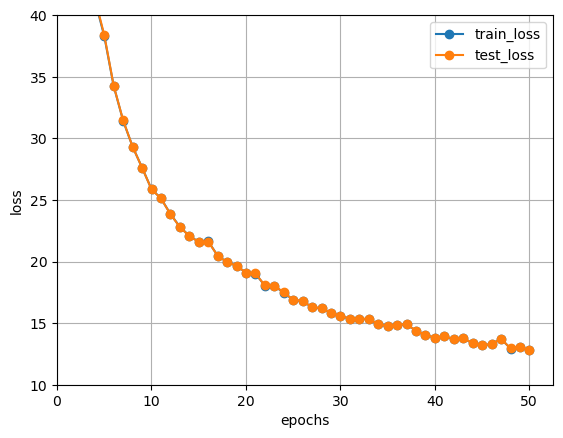

In [10]:
import matplotlib.pyplot as plt
ax = df.plot(x="epochs", y=["train_loss", "test_loss"], style="o-")
ax.set_ylim(10, 40)
ax.grid()
ax.set_ylabel("loss")
ax.set_xlim(0, None)
plt.savefig("loss.png", dpi=300, bbox_inches="tight")
# ax.set_yscale("log")

(0.0, 40.0)

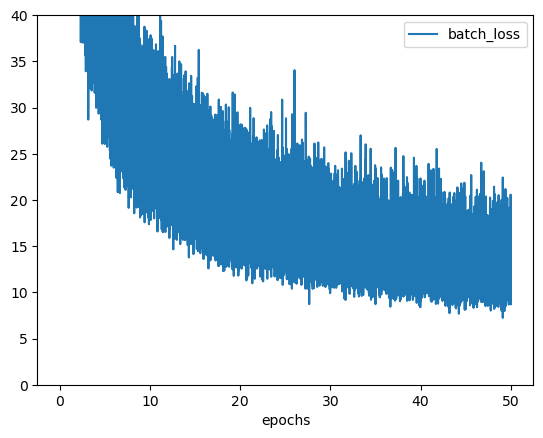

In [11]:
ax = df_train.plot(x="epochs", y="batch_loss")
ax.set_ylim(0, 40)
# ax.set_yscale("log")

In [22]:
def itransform(x, bounds=(-1, 1)):
    width = bounds[1] - bounds[0]
    offset = bounds[0]
    return (x - offset) / width

(32, 32, 3)
(32, 32, 3)
0.627451 0.16862744
0.6111374 0.19418687
(32, 32, 3)
(32, 32, 3)
0.7137255 0.14117646
0.690727 0.16709602
(32, 32, 3)
(32, 32, 3)
0.5803922 0.14117646
0.582555 0.1533278
(32, 32, 3)
(32, 32, 3)
0.5803922 0.09019607
0.59264946 0.13896865
(32, 32, 3)
(32, 32, 3)
0.8980393 0.11372548
0.83511674 0.115644336


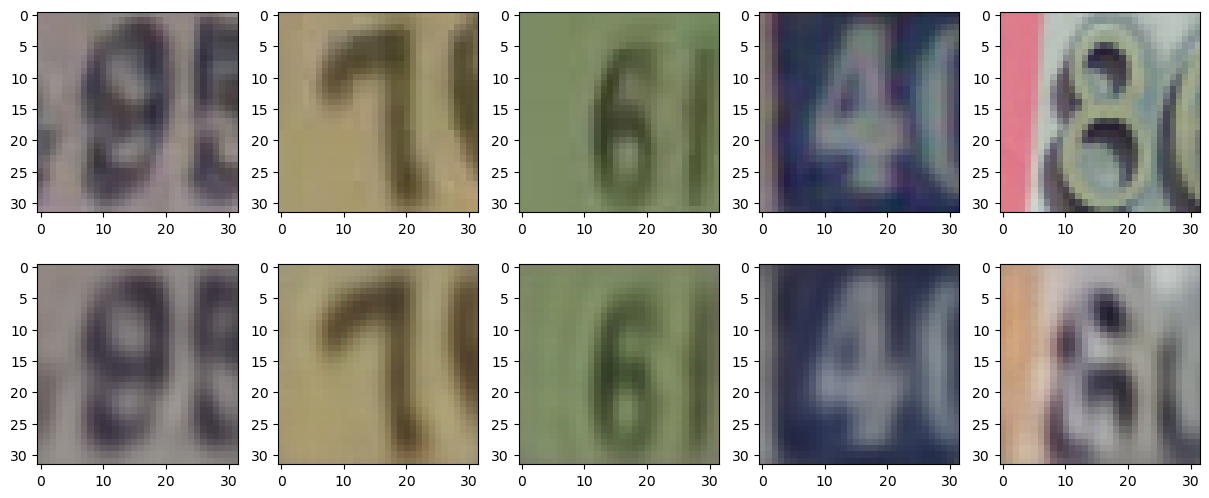

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import torch

w = 3
n_imgs = 5

model = model.to("cuda")
idx = np.random.choice(len(test_set), replace=False, size=n_imgs).tolist()
# idx = [2*i + 1 for i in range(n_imgs)]
imgs = [test_set[i][0] for i in idx]
imgs_in = torch.stack(imgs).to("cuda")
out = model(imgs_in).detach().cpu().numpy()

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(n_imgs * w, 2 * w))
for i in range(n_imgs):
    img = imgs[i] # [imgs[i][0], imgs[i][1], imgs[i][2]]
    oimg = out[i]
    img2 = np.stack((img[0, :, :], img[1, :, :], img[2, :, :]), axis=-1)
    out2 = np.stack((oimg[0], oimg[1], oimg[2]), axis=-1)
    img2 = itransform(img2)
    out2 = itransform(out2)
    print(img2.shape)
    print(out2.shape)
    print(img2.max(), img2.min())
    print(out2.max(), out2.min())
    axs[0][i].imshow(img2)
    axs[1][i].imshow(out2)

In [29]:
fig.savefig("./example.png", dpi=300, bbox_inches="tight")

In [34]:
!open .